# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

In [2]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

print X_raw.shape, y_raw.shape, X_raw_test.shape, y_raw_test.shape, n_train, n_test

Using TensorFlow backend.


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,) 60000 10000


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

In [3]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='gray') 
    plt.show() 

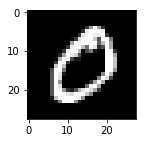

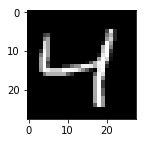

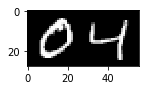

In [4]:
import numpy as np
y=np.hstack((X_raw[1],X_raw[2]))

plot_image(X_raw[1])
plot_image(X_raw[2])
plot_image(y)

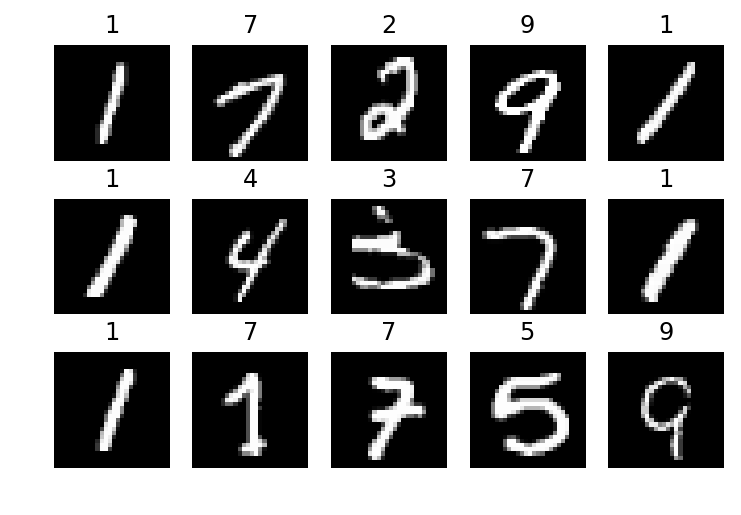

In [5]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))  #y_raw 是指數字titile
    plt.imshow(X_raw[index], cmap='gray')  #X_raw 是指數字圖片
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for index in range(X_len):      
        digits = random.randint(1, 5)
        
        for i in range(digits):
            j = random.randint(0, X_len-1) 
            X_gen[index,:,i*width:(i+1)*width,0] = X[j]
            y_gen[i][index][y[j]] = 1
            
        for i in range(digits, n_len):
            y_gen[i][index][10] = 1
    
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

#print X_test.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

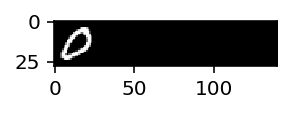

[0 0 0 0 0 0 0 0 0 1 0]


In [7]:
plot_image(X_valid[1][:,:,0])

print y_valid[1][1999]

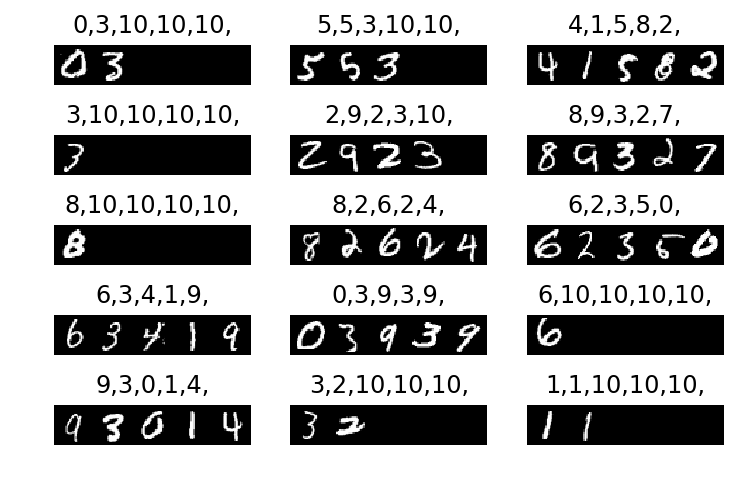

In [8]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**

首先系統建立兩個零矩陣，分別是X_gen（X_len, height, width*n_len, 1）, y_gen（n_len, X_len, n_class），接著:
1. 以X_gen的第一個維度X_len開始，利用 for迴圈1號 開始代入值index
2. 我們可以將（X_len, height, width*n_len, 1）的四個維度分別看成（照片數量, 照片的高度像素, 合成後五張照片的寬度像素, 灰階的顏色深淺）
3. 所以 for迴圈1號 開始從第一張照片，準備隨機開始代入 MNIST database 的像素資訊。此時的digits = random.randint(1, 5)代表會產生不定长数字序列
4. 接著在 for迴圈2號 分別代入range(digits)，即拼接成新的圖片含五張照片的寬度
5. 利用random.randint隨機選出j，利用X[j]取出隨機選中的一張照片，然後因 for迴圈2號跑五次，完成了第一張合成照片。
6. 最後因 for迴圈1號跑X_len次，完成X_gen整個訓練集
7. 我們可以將 y_gen（n_len, X_len, n_class）的三個維度分別看成（照片中有五個手寫數字, 每個手寫數字中隨機的數字, 每個隨機數字有n_class個）
8. （n_len, X_len, n_class）的第三個維度利用y[j]在原本label的數字位置代入1，因為此矩陣其他都是零，方便日後用argmax選出。
9. 最後一個for迴圈，將10代入剩下的照片空格中以便形成五格照片，這樣才能產生不定长数字序列。


### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [函数式模型 API](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [9]:
from keras.models import Model,Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dropout, Dense, Merge, Conv2D

# TODO: 构建你的模型
def train_model():
    '''
    model = Sequential()
    model.add(Conv2D(30,3,3,padding='same',input_shape=(28, 28*5, 1),activation='relu'))
    model.add(Conv2D(30,3,3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15,3,3,padding='same',activation='relu'))
    model.add(Conv2D(15,3,3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    print(model.summary())
    '''
    a = Input((28, 28*5, 1))
    b = Conv2D(60, (2, 2), padding='same', activation='relu')(a)
    b = Conv2D(60,(2, 2), padding='same', activation='relu')(b)
    b = Conv2D(60, (2, 2), padding='same', activation='relu')(b)
    b = MaxPooling2D(pool_size=(2, 2), padding='same')(b)
    b = Conv2D(30, (2, 2), padding='same', activation='relu')(b)
    b = Conv2D(30, (2, 2), padding='same', activation='relu')(b)
    b = Conv2D(30, (2, 2), padding='same', activation='relu')(b)
    b = MaxPooling2D(pool_size=(2, 2),padding='same')(b)    
    b = Flatten()(b)
    b = Dropout(0.2)(b)

    lst_output = [Dense(11, activation='softmax')(b) for i in range(n_len)]
    model = Model(inputs=a, outputs=lst_output)
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

train_model().summary()
#0.8436 各3層CON
#0.7881 各2層CON
#0.846   各2層CON，加深60,30
#0.8706 各3層CON，加深60,30
#0.8703 各3層CON，加深60,30, 變小FILTER


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 140, 1)    0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 28, 140, 60)   300         input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 28, 140, 60)   14460       conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 28, 140, 60)   14460       conv2d_2[0][0]                   
___________________________________________________________________________________________

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
- 卷積層：使用該層提取照片的特徵，主要利用同一個filter（同一個權重）來掃描照片，符合共用權重之CNN的特性。
- 為什麼加入激活函數層：事實上，神經網絡如果沒有激活函數層，依然能進行分類，只不過它是線性分類。所以，就算是使用了激活函數層，如果你的激活函數是線性函數的話，它依然只能進行線性分類。而目前大家之所以廣為使用 sigmoid、ReLU 函數是因為它們都是非線性函數，所以它能夠進行非線性分類，解決更多樣、複雜的問題。
- 使用ReLU作為卷積層的激活函數：因為傳統的sigmoid在求導數後，尾端值接近零，會造成梯度消失的問題，所以改使用Relu。因為方便求導數，所以收斂速度快，即神經網絡的訓練速度變快。

- 最大池化：將照片分割為多個2*2的矩陣，然後選出每個矩陣的最大值輸出。此法可以減少數據量，也能降低過擬合。

- Flatten：將输入層“壓平”，即把多維的輸入資料一維化，經常用在卷積層到全連接層（Dense）的過渡。
- Dropout：為輸入數據施加Dropout。在訓練過程中每次更新參數時按一定概率隨機剪斷輸入神經元，此層用於防止過擬合。
- Dense：即全連接層。第N層的每個神經元和第N-1層的所有神經元相連，且同一層的神經元之間沒有連接。

- 使用softmax作為最後輸出層的激活函數：把一個 k 維向量映射成一個（b1,b2,b3,b4….）其中 bi 是一個 0～1 的常數，輸出神經元之和為 1.0，所以相當於概率值，然後可以根據 bi 的概率大小來進行多分類的任務。因為本身的exp函數的原因，放大原本已經較大的訊號。

- loss='categorical_crossentropy'：交叉熵訓練的效果比較好，能夠更精確地描述模型與理想模型之間的差異。
ref:https://zhuanlan.zhihu.com/p/26268559

- optimizer='adam'：一般機器學習時更新的權重取決於learning rate與dx的乘積。而adam結合Momentum（調整權重）與AdaGrad（調整校正值dx）的兩者優點，使得收斂更快，也提高準確度。

### 可视化你的网络模型

参考链接：[可视化visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是保存成 PNG 格式显示，也可以直接使用 SVG 格式。 SVG 是矢量图，它的优点是可以无限放大。

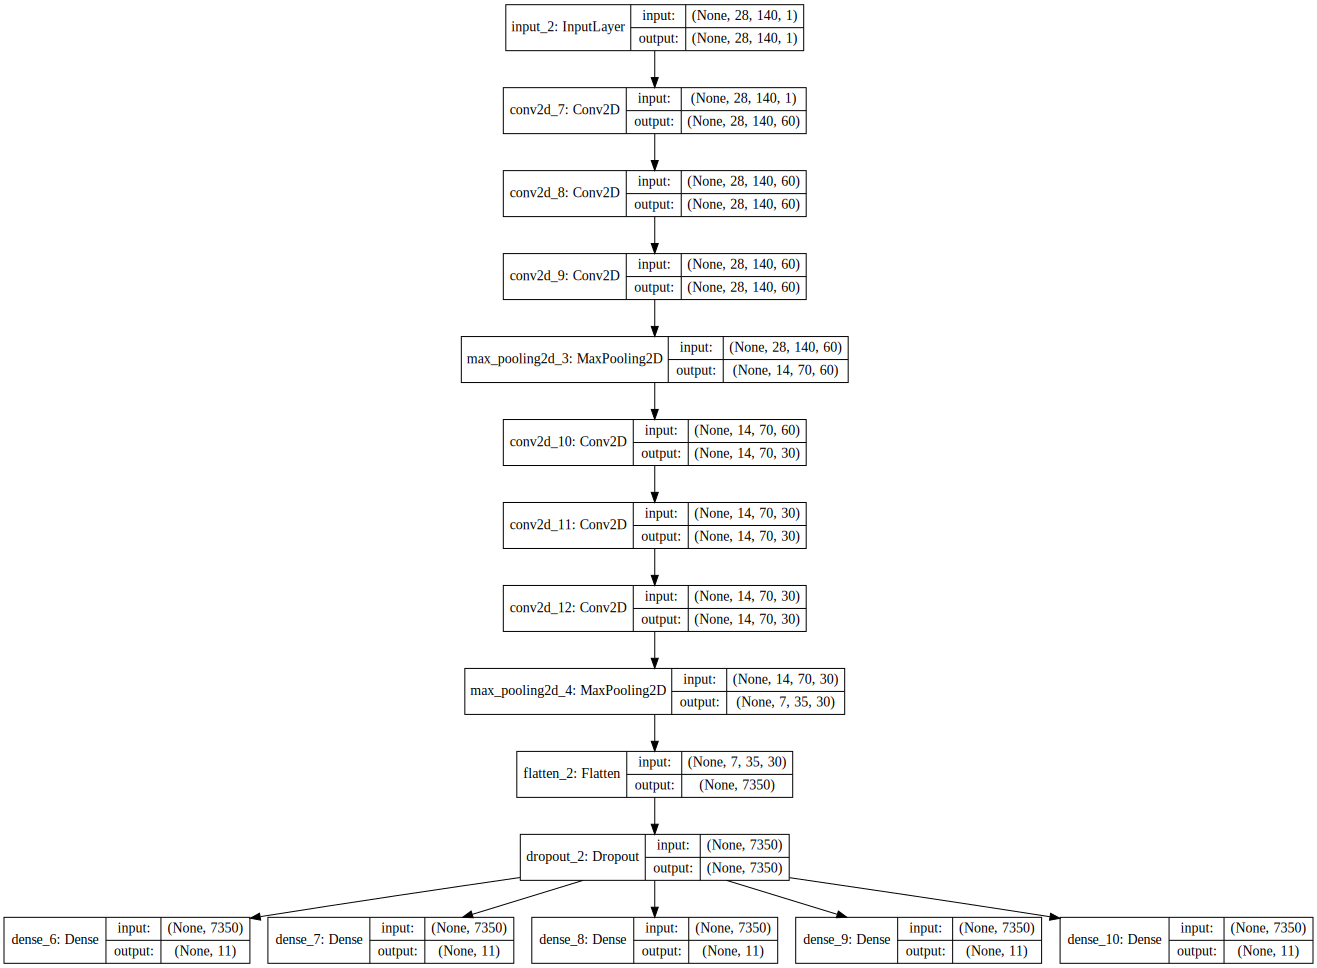

In [10]:
from keras.utils.vis_utils  import plot_model, model_to_dot
from keras.utils import plot_model

from IPython.display import Image, SVG

# TODO: 可视化你的模型

model =  train_model()       
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))
#plot_model(model, to_file='model.png')
#Image(filename = 'train_model.png')

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**
我的模型為CNN卷積神經網路：實際的層數、大小、如何連接等，可以參考 output[9]所輸出的train_model().summary()的結果。

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [11]:
# TODO: 训练你的模型
from keras.callbacks import EarlyStopping
valid=(X_valid, y_valid)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=2)
log = model.fit(X_train, y_train, epochs=20, validation_data=valid, batch_size=200, verbose=2,
               callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
816s - loss: 1.9131 - dense_6_loss: 0.5557 - dense_7_loss: 0.4457 - dense_8_loss: 0.4118 - dense_9_loss: 0.2967 - dense_10_loss: 0.2032 - dense_6_acc: 0.8396 - dense_7_acc: 0.8673 - dense_8_acc: 0.8840 - dense_9_acc: 0.9147 - dense_10_acc: 0.9481 - val_loss: 0.3342 - val_dense_6_loss: 0.0959 - val_dense_7_loss: 0.0838 - val_dense_8_loss: 0.0650 - val_dense_9_loss: 0.0562 - val_dense_10_loss: 0.0334 - val_dense_6_acc: 0.9698 - val_dense_7_acc: 0.9731 - val_dense_8_acc: 0.9791 - val_dense_9_acc: 0.9823 - val_dense_10_acc: 0.9897
Epoch 2/20
784s - loss: 0.3091 - dense_6_loss: 0.0950 - dense_7_loss: 0.0778 - dense_8_loss: 0.0623 - dense_9_loss: 0.0476 - dense_10_loss: 0.0265 - dense_6_acc: 0.9699 - dense_7_acc: 0.9752 - dense_8_acc: 0.9794 - dense_9_acc: 0.9849 - dense_10_acc: 0.9919 - val_loss: 0.2474 - val_dense_6_loss: 0.0718 - val_dense_7_loss: 0.0602 - val_dense_8_loss: 0.0474 - val_dense_9_loss: 0.0408 - val_dense_10_loss: 

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [12]:
y_pred = model.predict(X_test, batch_size=200)
pred = np.argmax(y_pred, axis=2)
#print y_pred
print pred

[[ 4  2  6 ...,  1  3  6]
 [10  5  6 ...,  1  4 10]
 [10 10  6 ...,  0  3 10]
 [10 10 10 ...,  5 10 10]
 [10 10 10 ...,  3 10 10]]


In [13]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    y_pred = model.predict(X_test, batch_size=200)
    pred = np.argmax(y_pred, axis=2)   #axis=2 代表是矩陣內的第三維：數字
    test = np.argmax(y_test, axis=2)  
    accuracy = np.min((pred==test), axis=0).mean()
    return accuracy

print(evaluate(model))

#scores = model.evaluate(X_test,y_test)
#print('accuracy=',scores[1])

0.9471


### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**
準確率0.9471。藉由調整一些參數，有助增加準確率:
- 增加卷積層的層數
- 加深卷積層的厚度


雖然目前準確率已經準確，但是針對其他的數據類型依然需要調整參數。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

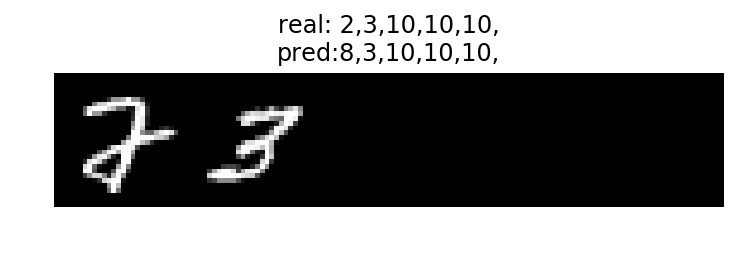

In [14]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要保存模型，以便下次调用。

读取的方式也很简单：`model = load_model('model.h5')`

In [15]:
model.save('model.h5')